In [19]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dropout,Dense,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split


In [4]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [5]:
#load the data

training_set = pd.read_csv('fashion-mnist_train.csv')
testing_set = pd.read_csv('fashion-mnist_test.csv')



In [11]:
#Preprocess the data 
# Reshape the given csv into the original images


# pixels values for each image
X_train = np.array(training_set.iloc[:,1:])
X_test = np.array(testing_set.iloc[:,1:])

X_train = X_train.reshape(X_train.shape[0],28,28,1).astype('float32')
X_test = X_test.reshape(X_test.shape[0],28,28,1).astype('float32')



X_train = X_train/255
X_test = X_test/255

#label for each image
y_train = to_categorical(np.array(training_set.iloc[:,0])) 
y_test = to_categorical(np.array(testing_set.iloc[:,0]))

In [29]:
# Building a cnn model
shape = (28,28,1)
number_of_classes = y_test.shape[1]
model = Sequential()
model.add(Conv2D(32,(5,5),activation ='relu',input_shape = shape ))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(number_of_classes, activation='softmax'))


In [30]:
# Compiling the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [31]:
# Training the model
batch_size = 150
epochs = 20
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 74s 1ms/step - loss: 0.4890 - acc: 0.8300 - val_loss: 0.3644 - val_acc: 0.8744
Epoch 2/20
60000/60000 [==============================] - 73s 1ms/step - loss: 0.3299 - acc: 0.8826 - val_loss: 0.2963 - val_acc: 0.8954
Epoch 3/20
60000/60000 [==============================] - 73s 1ms/step - loss: 0.2916 - acc: 0.8953 - val_loss: 0.2861 - val_acc: 0.8954
Epoch 4/20
60000/60000 [==============================] - 74s 1ms/step - loss: 0.2624 - acc: 0.9059 - val_loss: 0.2616 - val_acc: 0.9053
Epoch 5/20
60000/60000 [==============================] - 72s 1ms/step - loss: 0.2444 - acc: 0.9111 - val_loss: 0.2490 - val_acc: 0.9124
Epoch 6/20
60000/60000 [==============================] - 72s 1ms/step - loss: 0.2273 - acc: 0.9164 - val_loss: 0.2540 - val_acc: 0.9052
Epoch 7/20
60000/60000 [==============================] - 71s 1ms/step - loss: 0.2132 - acc: 0.9217 - val_loss: 0.2351 - val_acc

In [32]:
# Evaluate the model 
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.237071894461
Test accuracy: 0.9262


In [33]:
# Make predictions about the classes
predictions = model.predict_classes(X_test,batch_size=150)  


In [34]:
# Save the classification

filename = 'cnn_classification1.csv';
PictureID = list(range(1,len(predictions)+1))
submission = pd.DataFrame({'Clothe_category':predictions })
submission.to_csv(filename,header = True, index = False)
print('Saved file: ' + filename)

Saved file: cnn_classification1.csv


In [35]:
# Data Model visualization
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 592,074
Trainable params: 592,074
Non-trainable params: 0
_________________________________________________________________
None

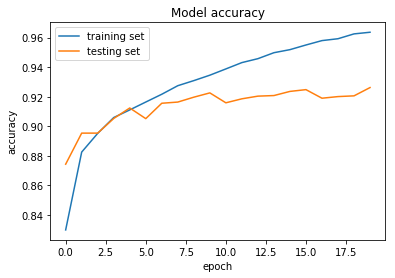

In [36]:
# Accuracy visualization
training_accuracy = history.history['acc']
testing_accuracy = history.history['val_acc']
plt.plot(training_accuracy)
plt.plot(testing_accuracy)
plt.title('Model accuracy')
plt.legend(['training set', 'testing set'], loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

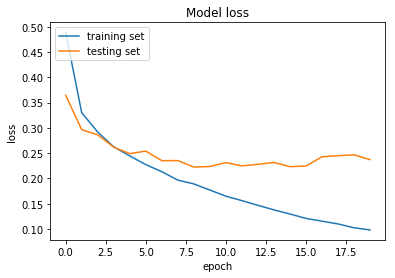

In [37]:
# Loss visualization

training_loss = history.history['loss']
testing_loss = history.history['val_loss']
plt.plot(training_loss)
plt.plot(testing_loss)
plt.title('Model loss')
plt.legend(['training set', 'testing set'], loc='upper left')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()
